In [2]:
%pip install mpl_scatter_density

In [8]:
print("\n... IMPORTS STARTING ...\n")

# Machine Learning and Data Science Imports (basics)
import pandas as pd; print(f"\t– PANDAS VERSION: {pd.__version__}");
import numpy as np; print(f"\t– NUMPY VERSION: {np.__version__}");

# Built-In Imports (mostly don't worry about these)
import os
import time
import gc

# Visualization Imports (overkill)
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from skimage import io 
try: 
    import mpl_scatter_density # for density scatter graph 
except:
    print("\tPlease install mpl_scatter_density!")
    
# Other Imports

print("\n... IMPORTS COMPLETE ...\n")


... IMPORTS STARTING ...

	– PANDAS VERSION: 2.0.3
	– NUMPY VERSION: 1.24.3

... IMPORTS COMPLETE ...



In [4]:
# for checking features properties during feature engineering
def check_features(features_df):
    fig, ax = plt.subplots(1, 2, figsize=(18,9))
    fig.tight_layout(pad=10.0)
    sns.boxplot(ax=ax[0], data=features_df, orient="h")
    sns.violinplot(ax=ax[1], data=features_df, orient="h")
    plt.show()

In [5]:
# convert features series into features datafame
def to_df(features_series): 
    features_df = pd.concat(features_series,axis=1)
    features_df = features_df.reset_index()
    features_df = features_df.set_index('session_id')
    return features_df

In [17]:
dtypes = {'session_id': 'category',
          'elapsed_time': np.int32,
          'event_name': 'category',
          'name': 'category',
          'level': np.uint8,
          'page': 'category',
          'room_coor_x': np.float32,
          'room_coor_y': np.float32,
          'screen_coor_x': np.float32,
          'screen_coor_y': np.float32,
          'hover_duration': np.float32,
          'text': 'category',
          'fqid': 'category',
          'room_fqid': 'category',
          'text_fqid': 'category',
          'fullscreen': np.int8,
          'hq': np.int8,
          'music': np.int8,
          'level_group': 'category'}
print("\n\n... LOAD DATA FROM CSV FILE ...")
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
labels_df = pd.read_csv('train_labels.csv')
submission_df = pd.read_csv('sample_submission.csv')
print(f"\n\n... LOAD DATA COMPLETE ...\n")



... LOAD DATA FROM CSV FILE ...


... LOAD DATA COMPLETE ...



In [11]:
print('Train data shape:', train_df.shape)
print("Sample of train data:")
train_df.head()

Train data shape: (26296946, 20)
Sample of train data:


,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group
0,20090312431273200,0,0,cutscene_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,0,0,1,0-4
1,20090312431273200,1,1323,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
2,20090312431273200,2,831,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
3,20090312431273200,3,1147,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
4,20090312431273200,4,1863,person_click,basic,0,NaN,-412.991405,-159.314686,381.0,494.0,NaN,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4


In [12]:
print('Train labels data shape:', labels_df.shape)
print("Sample of train_labels data:")
labels_df.head()

Train labels data shape: (424116, 2)
Sample of train_labels data:


,session_id,correct
0,20090312431273200_q1,1
1,20090312433251036_q1,0
2,20090312455206810_q1,1
3,20090313091715820_q1,0
4,20090313571836404_q1,1


In [13]:
print('Test data shape:', test_df.shape)
print("Sample of test data:")
test_df.head()

Test data shape: (3728, 21)
Sample of test data:


,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,...,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group,session_level
0,20090109393214576,0,0,cutscene_click,basic,0,NaN,-413.991405,75.685314,380.0,...,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,0,0,1,0-4,0
1,20090109393214576,1,1965,person_click,basic,0,NaN,-105.991405,-63.314686,688.0,...,NaN,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4,0
2,20090109393214576,2,3614,person_click,basic,0,NaN,-418.991405,47.685314,375.0,...,NaN,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4,0
3,20090109393214576,3,5330,person_click,basic,0,NaN,-110.991405,-57.314686,683.0,...,NaN,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4,0
4,20090109393214576,4,6397,person_click,basic,0,NaN,-110.991405,-57.314686,683.0,...,NaN,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4,0


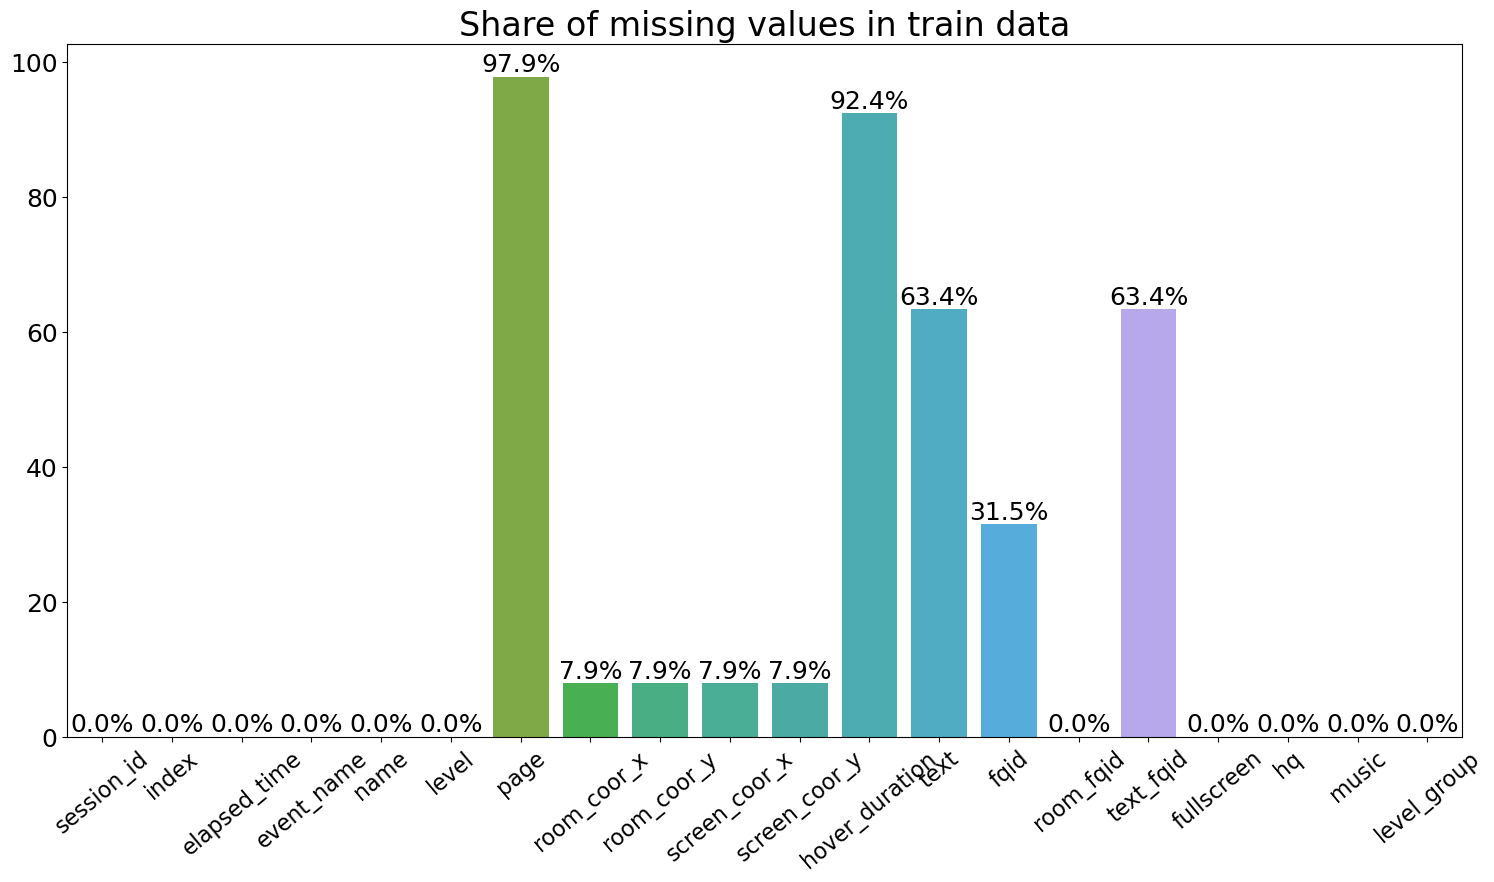

In [15]:
train_missing = train_df.isna().sum() / len(train_df) *100
train_missing_index = train_missing.index
train_missing_values = train_missing.values

fig, ax = plt.subplots(figsize=(18, 9))
barchart = sns.barplot(x = train_missing_index, y = train_missing_values, ax = ax)
barchart.axes.set_title("Share of missing values in train data", fontsize=24, loc = 'center')
barchart.bar_label(barchart.containers[0], fmt="%.1f%%", fontsize=18)
barchart.yaxis.set_tick_params(labelsize = 18)
barchart.xaxis.set_tick_params(rotation=40, labelsize = 16)
plt.show()

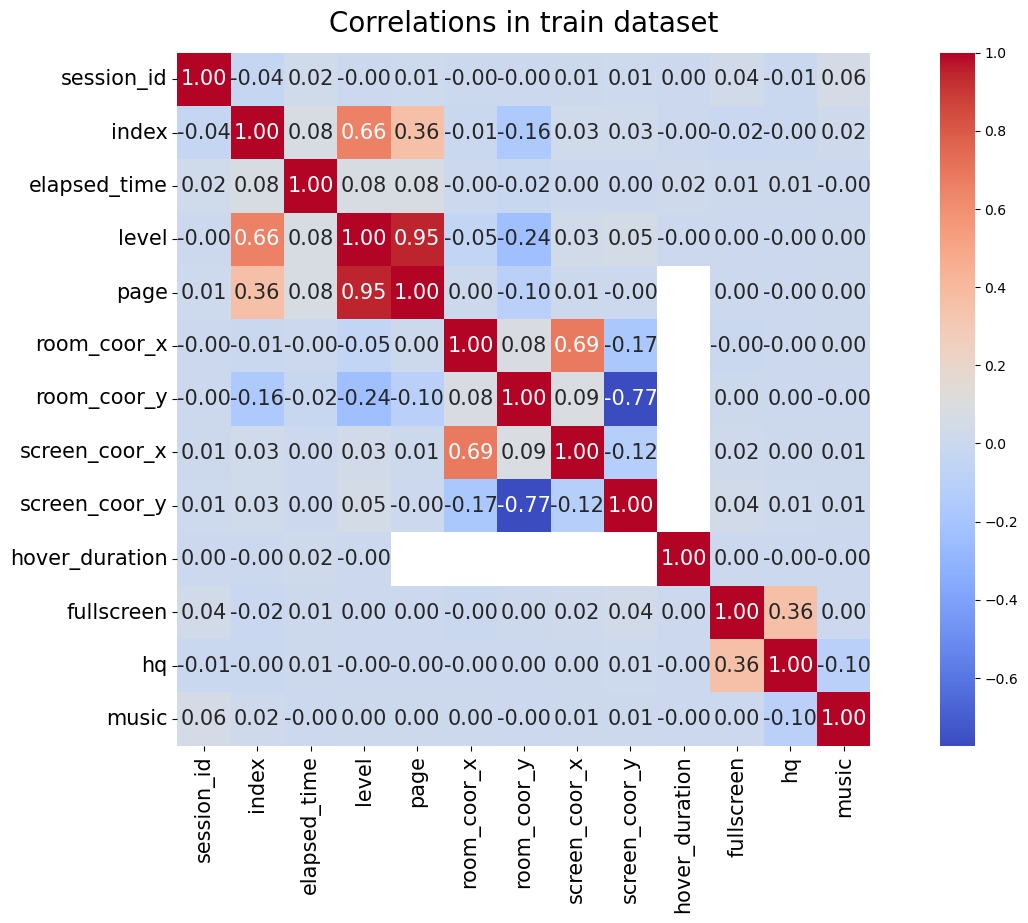

In [35]:
# Filter out non-numeric columns
numeric_columns = train_df.select_dtypes(include=[np.number])

# Create a correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the correlation heatmap
plt.figure(figsize=(18, 9))
g = sns.heatmap(correlation_matrix, annot=True, square=True, cmap='coolwarm', annot_kws={'size': 15}, fmt='.2f')
g.tick_params(axis='x', labelsize=15)
g.tick_params(axis='y', labelsize=15)
g.set_title('Correlations in train dataset', size=20, pad=15)
plt.show()

In [24]:
train_events_counts = train_df['session_id'].value_counts()
print(f"\n The number of unique session in train set: {len(train_events_counts)}")


 The number of unique session in train set: 23562


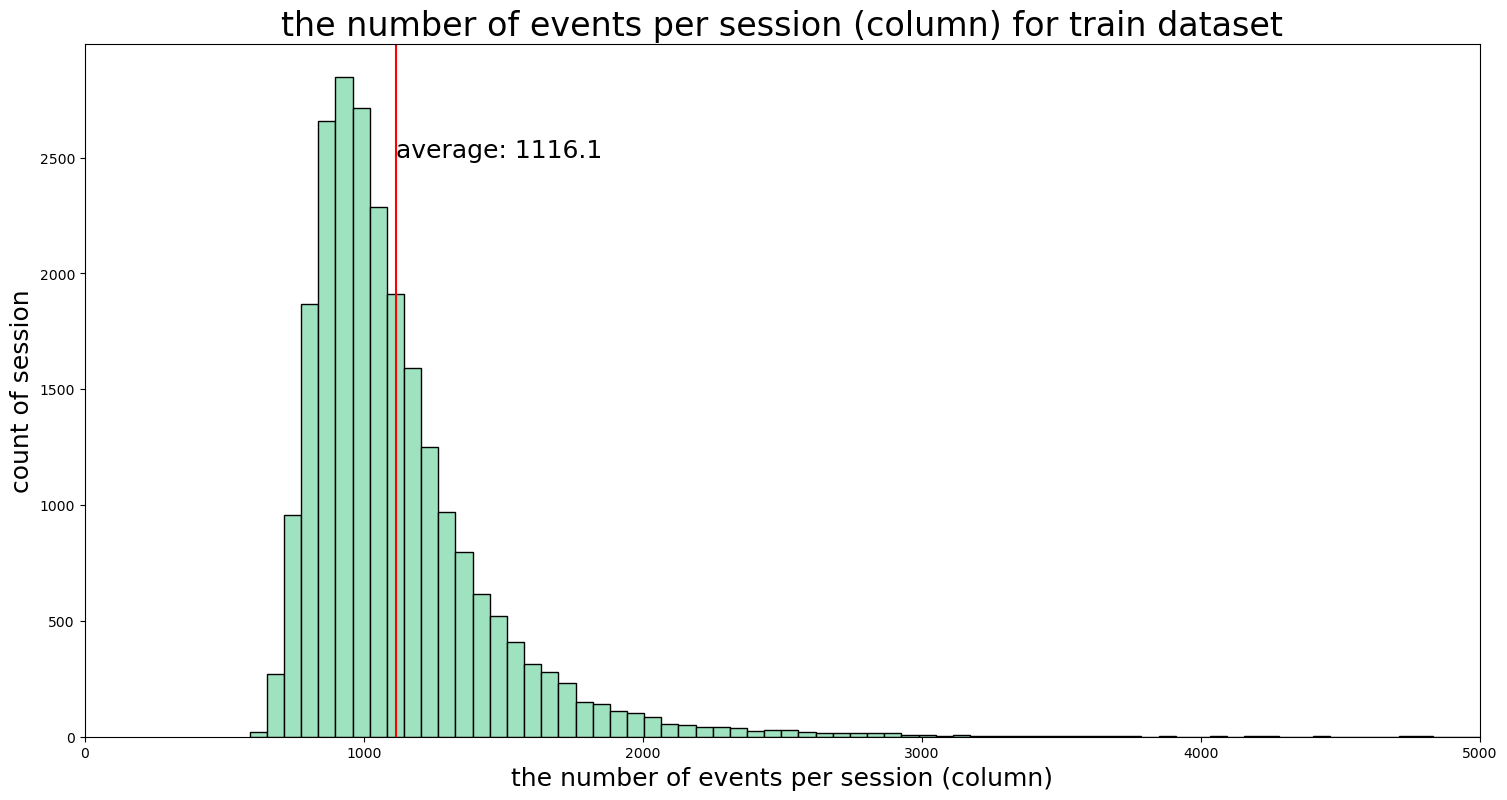

In [25]:
events_counts = train_events_counts.values

plt.figure(figsize=(18, 9))
plt.hist(events_counts, edgecolor="black", bins=300, color = "#9FE2BF")
plt.xlim(xmin=0, xmax = 5000)
plt.title("the number of events per session (column) for train dataset", fontsize=24)
plt.xlabel("the number of events per session (column)", fontsize=18)
plt.ylabel("count of session", fontsize=18)
plt.axvline(events_counts.mean(), color='r')
plt.text(events_counts.mean(), 2500, f'average: {events_counts.mean():.1f}', fontsize=18)
plt.show()

In [26]:
idx = train_df[['session_id', 'index']]
idx_dupl = idx[idx.duplicated()]
print(f"\n{len(idx_dupl)}/{len(train_df)} {len(idx_dupl)/len(train_df) * 10000:.1f}%% of the `session_id` and `index` pairs are dulicapted")

del idx, idx_dupl


34534/26296946 13.1%% of the `session_id` and `index` pairs are dulicapted


In [33]:
# Calculate elapsed_time in minutes and round to 1 decimal place
elapsed_time_train = np.round(train_df['elapsed_time'].astype(np.float64) / 60000.0, 1)
elapsed_time_test = np.round(test_df['elapsed_time'].astype(np.float64) / 60000.0, 1)

# Create a DataFrame with the statistics
stat = pd.DataFrame({
    'Statistic': ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'],
    'train': elapsed_time_train.describe().values,
    'test': elapsed_time_test.describe().values
})

# Display the statistics with formatting and styling
styled_stat = stat.style.format(precision=1).background_gradient().set_caption('The statistics of `elapsed_time` column')

# Print the styled statistics
styled_stat

,Statistic,train,test
0,count,26296946.0,3728.0
1,mean,66.9,34.4
2,std,521.2,34.7
3,min,0.0,0.0
4,25%,7.3,9.5
5,50%,16.9,19.6
6,75%,29.1,41.4
7,max,33143.4,108.7


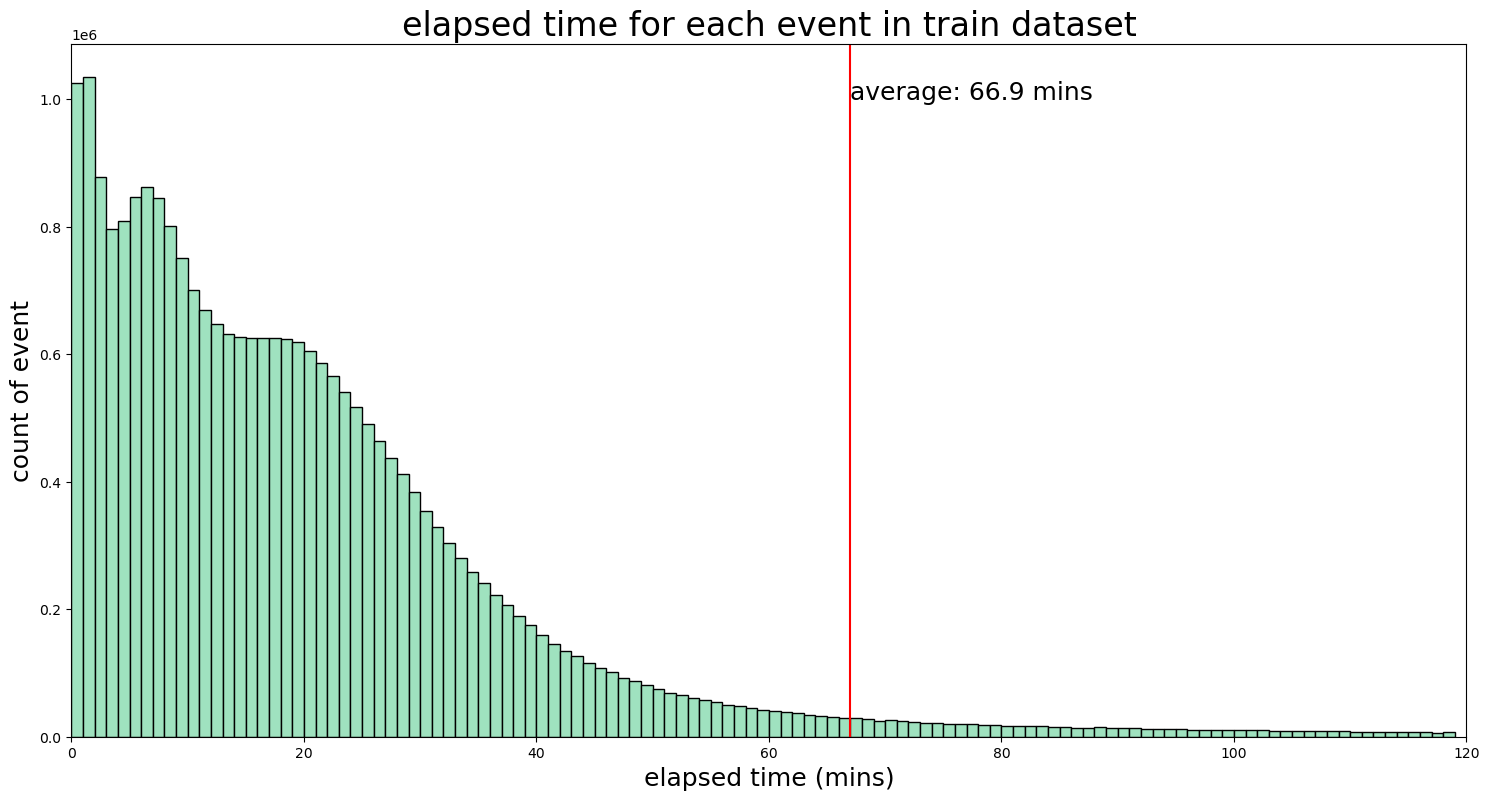

In [36]:
mean_elapsed_time_train = elapsed_time_train.mean()

plt.figure(figsize=(18, 9))
plt.hist(elapsed_time_train, edgecolor="black", bins=range(0, 120, 1), color = "#9FE2BF")
plt.xlim(0, 120)
plt.title("elapsed time for each event in train dataset", fontsize=24)
plt.xlabel("elapsed time (mins)", fontsize=18)
plt.ylabel("count of event", fontsize=18)
plt.axvline(mean_elapsed_time_train.mean(), color='r')
plt.text(mean_elapsed_time_train.mean(), 10**6, f'average: {mean_elapsed_time_train.mean():.1f} mins', fontsize=18)
plt.show()

del mean_elapsed_time_train, elapsed_time_train, elapsed_time_test

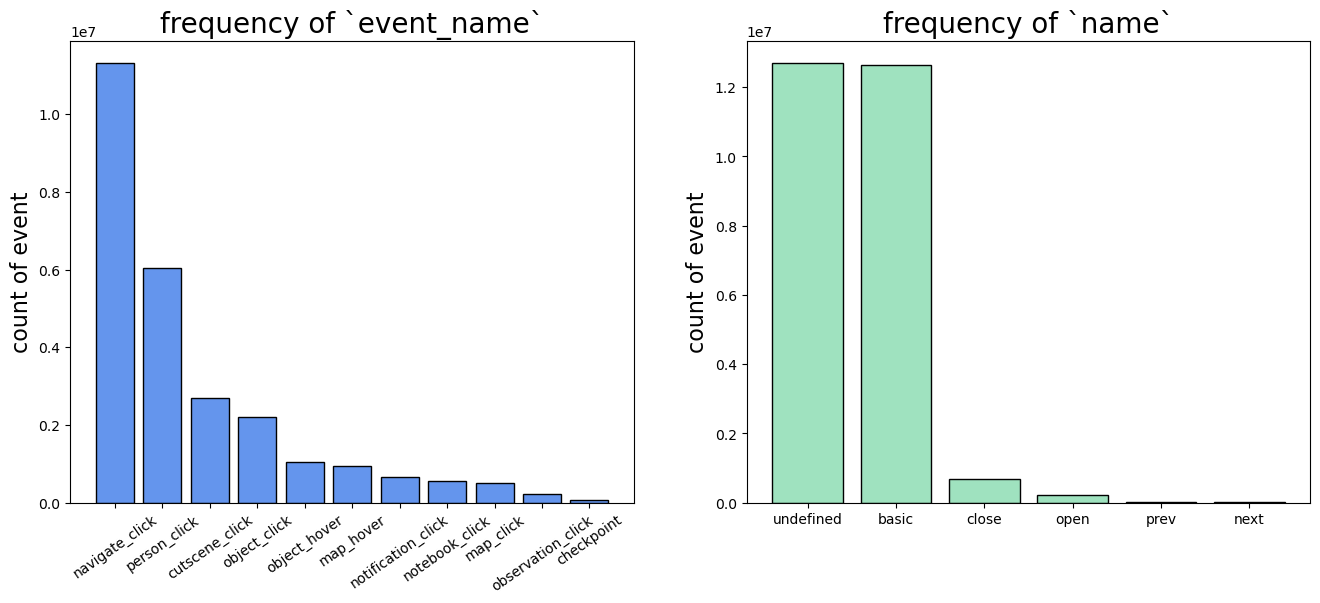

In [37]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
event_name = train_df["event_name"].value_counts()
plt.bar(event_name.index, event_name.values, edgecolor="black", color = "#6495ED")
plt.xticks(rotation = 35)
plt.title("frequency of `event_name`", fontsize = 20)
plt.ylabel("count of event", fontsize = 16)

plt.subplot(1, 2, 2)
name = train_df["name"].value_counts()
plt.bar(name.index, name.values, edgecolor="black", color = "#9FE2BF")
plt.title("frequency of `name`", fontsize = 20)
plt.ylabel("count of event", fontsize = 16)

plt.show()

del event_name, name

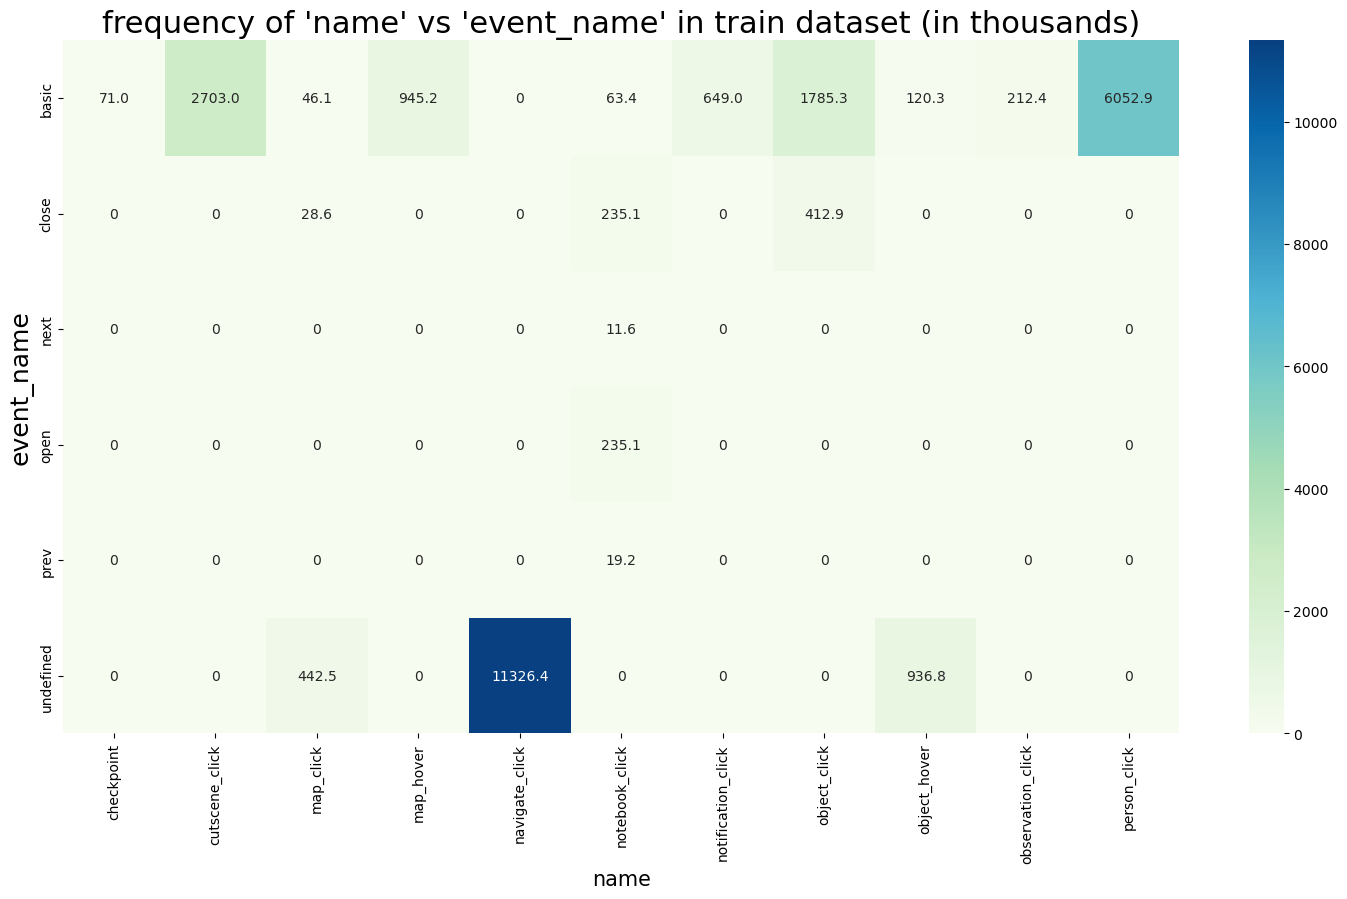

In [38]:
pivot = train_df.pivot_table(index='name', columns='event_name', aggfunc='size')
pivot = (pivot.fillna(0) / 1000).round(decimals = 1)
plt.figure(figsize=(18, 9))
annotations = pivot.astype(str)
annotations[pivot == 0] = "0"
g = sns.heatmap(pivot, annot=annotations, fmt='', cmap='GnBu')
plt.title("frequency of 'name' vs 'event_name' in train dataset (in thousands)", fontsize=22)
plt.xlabel("name", fontsize = 15)
plt.ylabel("event_name", fontsize = 18)
plt.show()

del pivot, g

<Figure size 1800x1200 with 0 Axes>

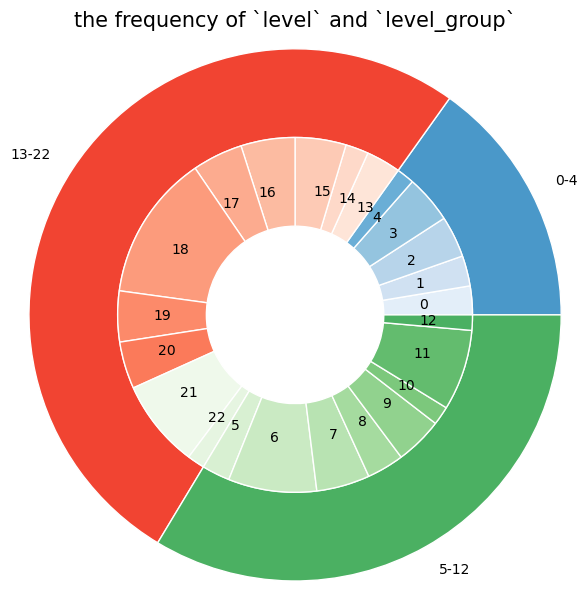

In [39]:
outer = train_df.groupby(by = 'level_group')['session_id'].count()
inner = train_df.groupby(by = ['level_group', 'level'])['session_id'].count()
inner = inner[inner != 0]
# inner_labels = inner.index.get_level_values(1)


plt.figure(figsize=(18, 12))

# Make data
group_names=outer.index
group_size=outer.values
subgroup_names = inner.index.get_level_values(1)
subgroup_size=inner.values

# Create colors
a, b, c=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens]
 
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.8, labels=group_names, colors=[a(0.6), b(0.6), c(0.6)])
plt.setp( mypie, width=0.6, edgecolor='white')
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.8-0.6, labels=subgroup_names, labeldistance=0.7, 
                   colors=[a(0.1), a(0.2), a(0.3), a(0.4), a(0.5),
                           b(0.1), b(0.15), b(0.2), b(0.25), b(0.3), b(0.35), b(0.4), b(0.45), 
                           c(0.06 * 1), c(0.06 * 2), c(0.06 * 3), c(0.06 * 4), c(0.06 * 5), 
                           c(0.06 * 6), c(0.06 * 7), c(0.06 * 8), c(0.06 * 9), c(0.06 * 10), c(0.06 * 11), c(0.06 * 12)  ])
plt.setp( mypie2, width=0.6, edgecolor='white')

plt.text(0.5, 1.28, "the frequency of `level` and `level_group`",
         horizontalalignment='center',
         fontsize=15,
         transform = ax.transAxes)

plt.show()

In [40]:
page = train_df[~train_df["page"].isna()]
print(f"\nonly {len(page)} of `page` in train dataset is not NaN, it accounts for {len(page)/len(train_df)*100:.1f}% of the whole train dataset")


only 564544 of `page` in train dataset is not NaN, it accounts for 2.1% of the whole train dataset


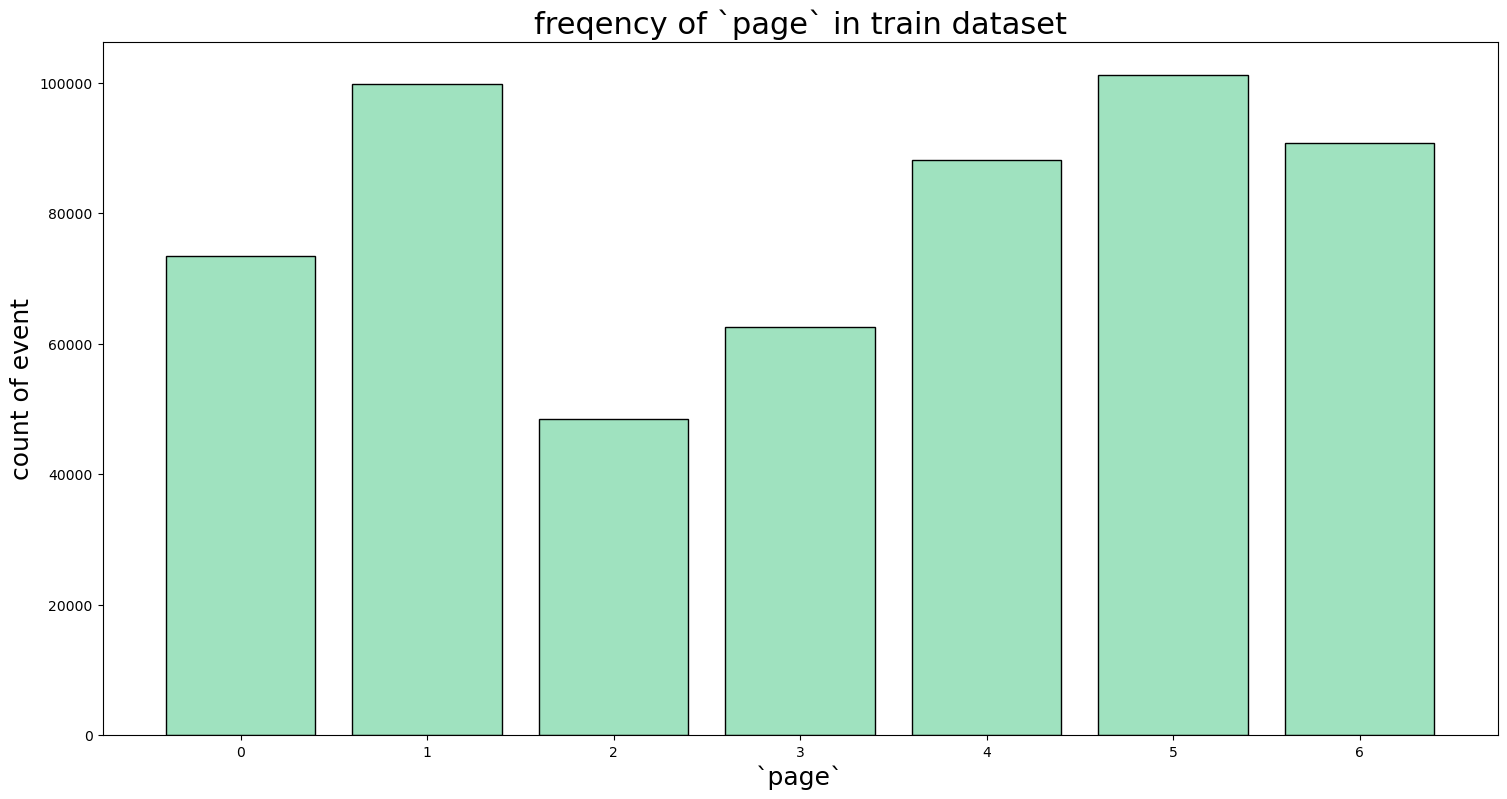

In [41]:
page_piv = page.groupby("page")["session_id"].count()


plt.figure(figsize=(18, 9))
plt.bar(page_piv.index, page_piv.values, edgecolor="black", color = "#9FE2BF")
plt.title("freqency of `page` in train dataset", fontsize=22)
plt.xlabel("`page`", fontsize=18)
plt.ylabel("count of event", fontsize=18)
plt.show()

del page, page_piv

In [42]:
coor = train_df[~train_df["room_coor_x"].isna()]
print(f"\n{len(coor)} of the geo-location data in train dataset is not NaN, it accounts for {len(coor)/len(train_df)*100:.1f}% of the whole train dataset")


24223674 of the geo-location data in train dataset is not NaN, it accounts for 92.1% of the whole train dataset


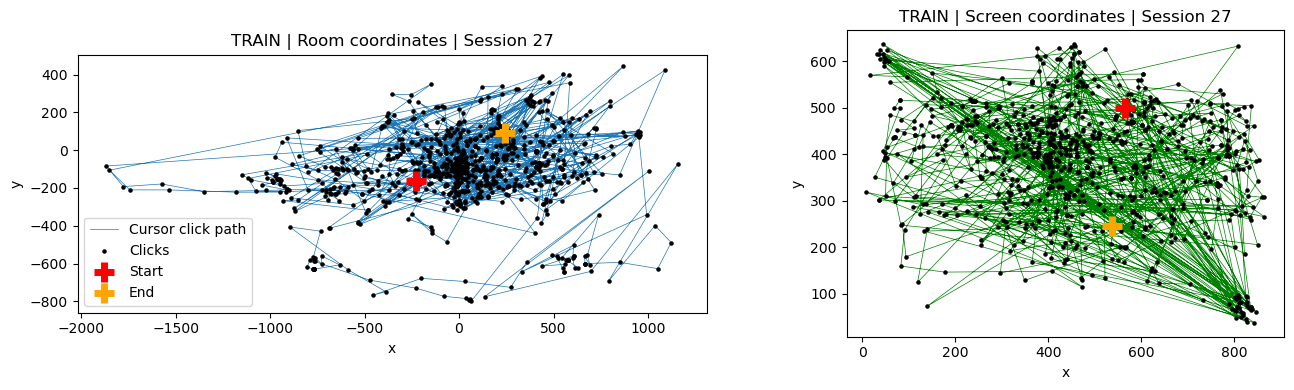

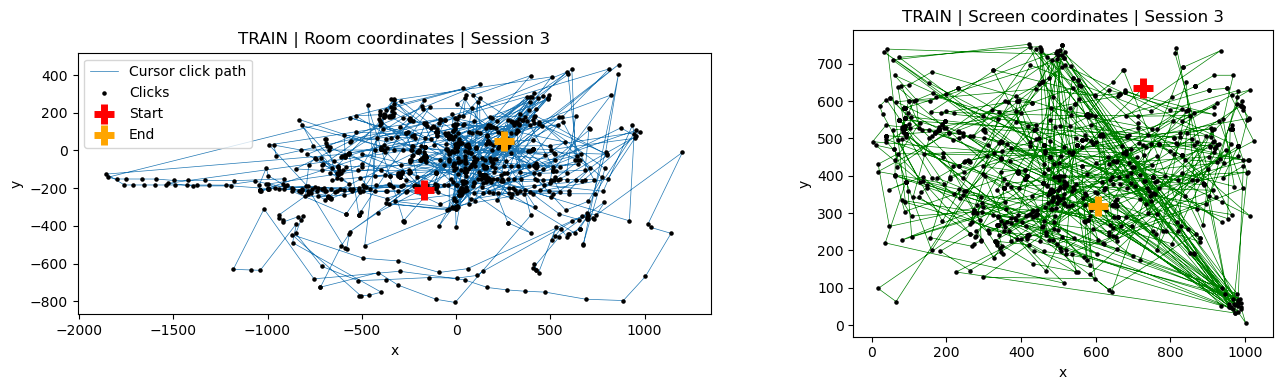

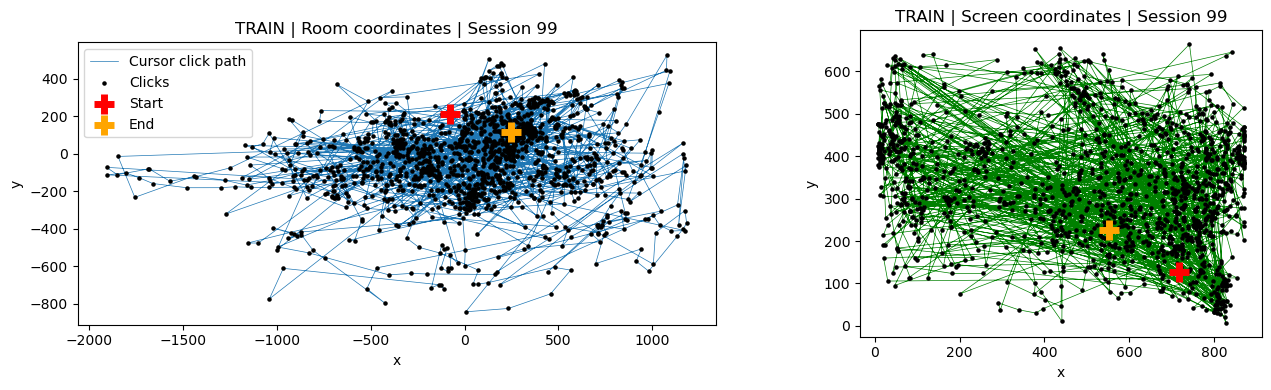

In [44]:
def plot_coordinates(i, set_name):
    df = train_df if set_name == 'TRAIN' else test_df
    session_ids = np.array(df['session_id'].unique())
    one_session = df[df['session_id'] == session_ids[i]]
    plt.figure(figsize=(14, 4))
    
    # Room coordinates
    coords = one_session[['room_coor_x', 'room_coor_y']].dropna().reset_index(drop=True)
    x = coords['room_coor_x']
    y = coords['room_coor_y']
    plt.subplot(1, 2, 1)
    plt.plot(x, y, zorder=0, lw=0.5)
    plt.scatter(x, y, s=5, color='black')
    plt.scatter(x[0], y[0], s=200, lw=5, color='red', marker='+')
    plt.scatter(x[-1:], y[-1:], s=200, lw=5, color='orange', marker='+')
    plt.legend(['Cursor click path', 'Clicks', 'Start', 'End'])
    plt.gca().set_aspect('equal', adjustable='box')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"{set_name} | Room coordinates | Session {i}")
    
    # Screen coordinates
    coords = one_session[['screen_coor_x', 'screen_coor_y']]\
        .dropna().reset_index(drop=True)
    x = coords['screen_coor_x']
    y = coords['screen_coor_y']
    plt.subplot(1, 2, 2)
    plt.plot(x, y, zorder=0, lw=0.5, color='green')
    plt.scatter(x, y, s=5, color='black')
    plt.scatter(x[0], y[0], s=200, lw=5, color='red', marker='+')
    plt.scatter(x[-1:], y[-1:], s=200, lw=5, color='orange', marker='+')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"{set_name} | Screen coordinates | Session {i}")
    
    plt.tight_layout()
    plt.show()

# Plot 3 session examples from the train set
for i in [27, 3, 99]:
    plot_coordinates(i, 'TRAIN')

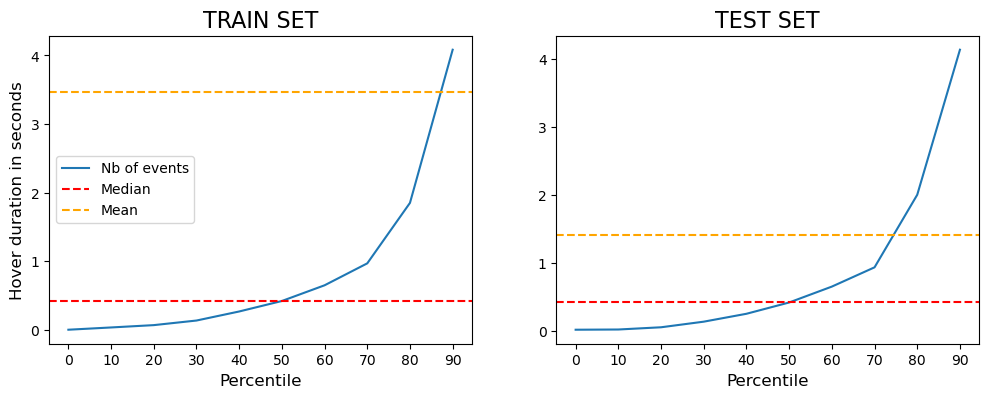

In [57]:
train_hover_durations = train_df['hover_duration'].dropna() / 1000
test_hover_durations = test_df['hover_duration'].dropna() / 1000

xrange = range(0, 100, 10)
train_percentiles , test_percentiles = [], []
for q in xrange:
    train_perc = np.percentile(train_hover_durations, q)
    test_perc = np.percentile(test_hover_durations, q)
    train_percentiles.append(train_perc)
    test_percentiles.append(test_perc)
    
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(xrange, train_percentiles)
plt.axhline(train_hover_durations.median(), color='red', ls='--')
plt.axhline(train_hover_durations.mean(), color='orange', ls='--')
plt.xticks(xrange)
plt.yticks(range(0, 5))
plt.legend(['Nb of events', 'Median', 'Mean'])
plt.xlabel("Percentile", fontsize=12)
plt.ylabel("Hover duration in seconds", fontsize=12)
plt.title("TRAIN SET", fontsize=16)

plt.subplot(1, 2, 2)
plt.plot(xrange, test_percentiles)
plt.axhline(test_hover_durations.median(), color='red', ls='--')
plt.axhline(test_hover_durations.mean(), color='orange', ls='--')
plt.xticks(xrange)
plt.xlabel("Percentile", fontsize=12)
plt.title("TEST SET", fontsize=16)

plt.show()

In [58]:
print(f"\nIn train daset, {(~train_df['text'].isna()).sum()} `text` of events are not NaN. It accounts for {100 - train_df['text'].isna().sum() / len(train_df) * 100:.1f}% of the whole train dataset.")
print(f"In train daset, {(~train_df['text_fqid'].isna()).sum()} `text_fqid` of events are not NaN. It accounts for {100 - train_df['text_fqid'].isna().sum() / len(train_df) * 100:.1f}% of the whole train dataset.")


In train daset, 9617139 `text` of events are not NaN. It accounts for 36.6% of the whole train dataset.
In train daset, 9617244 `text_fqid` of events are not NaN. It accounts for 36.6% of the whole train dataset.


In [59]:
print("\nAll the event whose `text` is not NaN, its `text_fqid` is also not NaN.")
print(f'The number of events whose `text` is not NaN but `text_fqid` is NaN: {train_df[~(train_df["text"].isna()) & (train_df["text_fqid"].isna())]["text"].count()}.')

print("\nThere are some events whose `text-fqid` is not NaN, but `text` is NaN.")
print(f'The number of events whose `text` is not NaN but `test` is NaN: {train_df[~(train_df["text_fqid"].isna()) & (train_df["text"].isna())]["text_fqid"].count()}.')

print(f"\nThis is a sample of event whose `text` is not NaN but `text` is NaN.")
pd.set_option('display.width', 1000)
train_df[(train_df["text"].isna()) & ~(train_df["text_fqid"].isna())][["text", "text_fqid"]]


All the event whose `text` is not NaN, its `text_fqid` is also not NaN.
The number of events whose `text` is not NaN but `text_fqid` is NaN: 0.

There are some events whose `text-fqid` is not NaN, but `text` is NaN.
The number of events whose `text` is not NaN but `test` is NaN: 105.

This is a sample of event whose `text` is not NaN but `text` is NaN.


,text,text_fqid
299422,NaN,tunic.historicalsociety.entry.gramps.hub
660031,NaN,tunic.historicalsociety.entry.gramps.hub
1727007,NaN,tunic.historicalsociety.entry.directory.closeu...
1727008,NaN,tunic.historicalsociety.entry.directory.closeu...
1806929,NaN,tunic.historicalsociety.stacks.journals_flag.p...
...,...,...
24318098,NaN,tunic.historicalsociety.entry.gramps.hub
24437716,NaN,tunic.historicalsociety.entry.gramps.hub
24980707,NaN,tunic.historicalsociety.entry.gramps.hub
25143348,NaN,tunic.historicalsociety.entry.gramps.hub


In [60]:
print(f'\nIn train dataset, we have {train_df["text"].nunique()} unique `text`.')
print(f'In train dataset, we have {train_df["text_fqid"].nunique()} unique `text_fqid`.')
print("\nThe relationship between `text` and `text_fqid` is N:N")


In train dataset, we have 597 unique `text`.
In train dataset, we have 126 unique `text_fqid`.

The relationship between `text` and `text_fqid` is N:N


In [61]:
print("\nThe top 10 frequency `text` are:")
t = train_df.groupby(by = ["text"])["session_id"].count()
t = t.sort_values(ascending=False).head(10).to_frame().reset_index()
t = t.rename(columns={"session_id": "frequency of event"})
t.style.format(precision=0)


The top 10 frequency `text` are:


,text,frequency of event
0,undefined,355969
1,\u00f0\u0178\u02dc\u0090,48805
2,Hey!,47452
3,I should go to the Capitol and tell Mrs. M!,40463
4,This is perfect for the exhibit.,40218
5,Look at all those activists!,40215
6,"If I were you, I'd go to the library and do some digging.",39248
7,Ugh. Fine.,36009
8,\u00f0\u0178\u02dc\u00b4,35654
9,You can talk to a textile expert there.,35202


In [62]:
print("\nThe top 10 frequency `text_fqid` are:")
t = train_df.groupby(by = ["text_fqid"])["session_id"].count()
t = t.sort_values(ascending=False).head(10).to_frame().reset_index()
t = t.rename(columns={"session_id": "frequency of event"})
t.style.format(precision=0)


The top 10 frequency `text_fqid` are:


,text_fqid,frequency of event
0,tunic.historicalsociety.cage.confrontation,666557
1,tunic.wildlife.center.crane_ranger.crane,470755
2,tunic.historicalsociety.frontdesk.archivist.newspaper,429762
3,tunic.historicalsociety.entry.groupconvo,427180
4,tunic.wildlife.center.wells.nodeer,399967
5,tunic.historicalsociety.frontdesk.archivist.have_glass,394908
6,tunic.drycleaner.frontdesk.worker.hub,362883
7,tunic.historicalsociety.closet_dirty.gramps.news,334439
8,tunic.humanecology.frontdesk.worker.intro,300110
9,tunic.historicalsociety.frontdesk.archivist_glasses.confrontation,263308


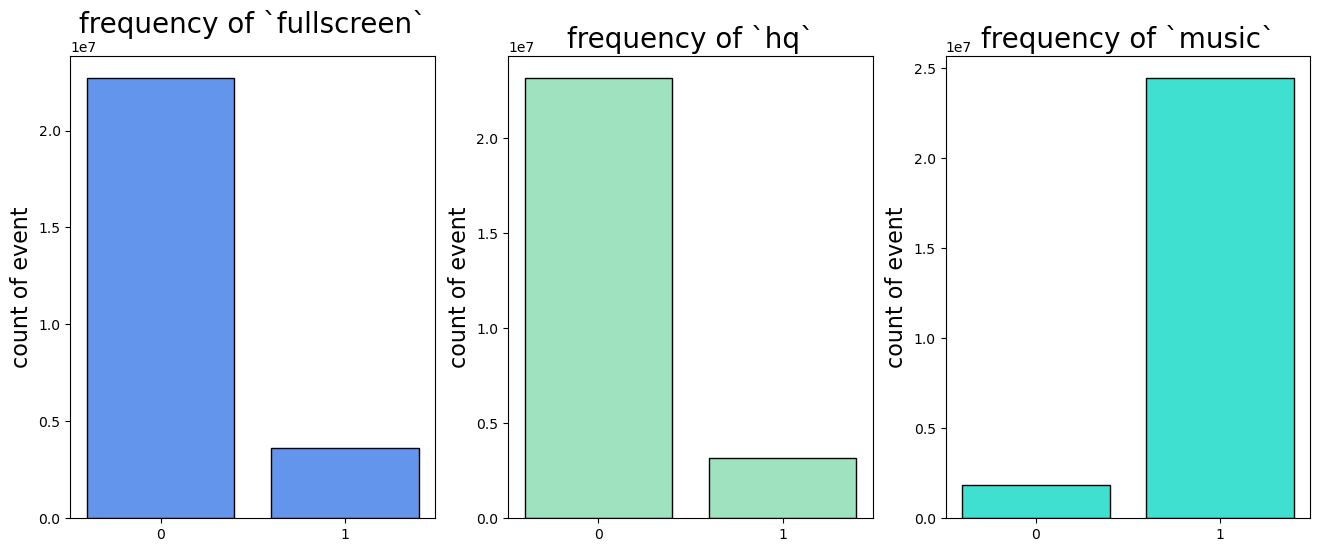

In [64]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 3, 1)
fullscreen = train_df["fullscreen"].value_counts()
plt.bar(fullscreen.index, fullscreen.values, edgecolor="black", color = "#6495ED")
plt.title("frequency of `fullscreen`", fontsize = 20)
plt.ylabel("count of event", fontsize = 16)
plt.xticks(ticks = [0, 1])

plt.subplot(1, 3, 2)
hq = train_df["hq"].value_counts()
plt.bar(hq.index, hq.values, edgecolor="black", color = "#9FE2BF")
plt.title("frequency of `hq`", fontsize = 20)
plt.ylabel("count of event", fontsize = 16)
plt.xticks(ticks = [0, 1])

plt.subplot(1, 3, 3)
music = train_df["music"].value_counts()
plt.bar(music.index, music.values, edgecolor="black", color = "#40E0D0")
plt.title("frequency of `music`", fontsize = 20)
plt.ylabel("count of event", fontsize = 16)
plt.xticks(ticks = [0, 1])

plt.show()


In [66]:
for col in ['fullscreen', 'hq', "music"]:
    piv = train_df.groupby(['session_id', col])["index"].count()
    piv = piv[piv != 0]
    session = piv.index.get_level_values(0)
    switched_music_amt = session.duplicated(keep='first').sum()
    print(f"{switched_music_amt} player has switched {col} during playing the game")

0 player has switched fullscreen during playing the game
0 player has switched hq during playing the game
0 player has switched music during playing the game


In [77]:
pip install --user xgboost

Note: you may need to restart the kernel to use updated packages.


In [79]:
from sklearn.model_selection import KFold, GroupKFold
from sklearn.metrics import f1_score

In [78]:
targets = pd.read_csv('train_labels.csv')
targets['session'] = targets.session_id.apply(lambda x: int(x.split('_')[0]) )
targets['q'] = targets.session_id.apply(lambda x: int(x.split('_')[-1][1:]) )
print( targets.shape )
targets.head()

(424116, 4)


,session_id,correct,session,q
0,20090312431273200_q1,1,20090312431273200,1
1,20090312433251036_q1,0,20090312433251036,1
2,20090312455206810_q1,1,20090312455206810,1
3,20090313091715820_q1,0,20090313091715820,1
4,20090313571836404_q1,1,20090313571836404,1


In [70]:
CATS = ['event_name', 'name','fqid', 'room_fqid', 'text_fqid']
NUMS = ['elapsed_time','level','page','room_coor_x', 'room_coor_y', 
        'screen_coor_x', 'screen_coor_y', 'hover_duration']

In [72]:
def feature_engineer(train_df):
    '''
    This function preprocess the data "train" : nunique for categorical variables,
    and mean\std for numerical variables
    param:
    tarin : Pandas DataFrame
    '''
    dfs = []
    for c in CATS:
        tmp = train_df.groupby(['session_id','level_group'])[c].agg('nunique')
        tmp.name = tmp.name + '_nunique'
        dfs.append(tmp)
    for c in NUMS:
        tmp = train_df.groupby(['session_id','level_group'])[c].agg('mean')
        dfs.append(tmp)
    for c in NUMS:
        tmp = train_df.groupby(['session_id','level_group'])[c].agg('std')
        tmp.name = tmp.name + '_std'
        dfs.append(tmp)
    df = pd.concat(dfs,axis=1)
    df = df.fillna(-1)
    df = df.reset_index()
    df = df.set_index('session_id')
    return df

In [73]:
%%time
df = feature_engineer(train_df)
print( df.shape )
df.head()

(70686, 22)
CPU times: user 1min 16s, sys: 9.68 s, total: 1min 26s
Wall time: 1min 27s


,level_group,event_name_nunique,name_nunique,fqid_nunique,room_fqid_nunique,text_fqid_nunique,elapsed_time,level,page,room_coor_x,...,screen_coor_y,hover_duration,elapsed_time_std,level_std,page_std,room_coor_x_std,room_coor_y_std,screen_coor_x_std,screen_coor_y_std,hover_duration_std
session_id,,,,,,,,,,,,,,,,,,,,,
20090312431273200,0-4,10,3,30,7,17,8.579356e+04,1.945455,-1.0,7.701275,...,383.044872,2389.500000,49246.539458,1.230975,-1.000000,399.296040,129.292411,214.871000,104.082743,3227.370757
20090312431273200,13-22,10,3,49,12,35,1.040601e+06,17.402381,-1.0,-130.347170,...,379.301020,899.925926,126666.129584,2.358652,-1.000000,622.061375,230.370874,240.280218,99.067861,1305.088265
20090312431273200,5-12,10,3,39,11,24,3.572052e+05,8.054054,-1.0,14.306062,...,378.784906,969.333333,80175.676658,2.096919,-1.000000,357.227700,137.409476,203.268560,120.255453,1316.408315
20090312433251036,0-4,11,4,22,6,11,9.763342e+04,1.870504,0.0,-84.045960,...,370.723077,1378.750000,67372.714092,1.232616,0.000000,445.980040,156.186242,252.554707,121.062929,2114.876406
20090312433251036,13-22,11,6,73,16,43,2.498852e+06,17.762529,5.1,-30.762282,...,387.930077,720.384921,777382.529186,1.825923,0.863075,529.575656,234.279590,259.288856,133.345693,1990.705518


In [76]:
FEATURES = [c for c in df.columns if c != 'level_group']
print('We will train with', len(FEATURES) ,'features')
ALL_USERS = df.index.unique()
print('We will train with', len(ALL_USERS) ,'users info')

We will train with 21 features
We will train with 23562 users info


In [82]:
gkf = GroupKFold(n_splits=5)
oof = pd.DataFrame(data=np.zeros((len(ALL_USERS),18)), index=ALL_USERS)
models = {}

# COMPUTE CV SCORE WITH 5 GROUP K FOLD
for i, (train_index, test_index) in enumerate(gkf.split(X=df, groups=df.index)):
    print('#'*25)
    print('### Fold',i+1)
    print('#'*25)
    
    xgb_params = {
    'objective' : 'binary:logistic',
    'eval_metric':'logloss',
    'learning_rate': 0.05,
    'max_depth': 4,
    'n_estimators': 1000,
    'early_stopping_rounds': 50,
    'tree_method':'hist',
    'subsample':0.8,
    'colsample_bytree': 0.4,
    'use_label_encoder' : False}
    
    # ITERATE THRU QUESTIONS 1 THRU 18
    for t in range(1,19):
        
        # USE THIS TRAIN DATA WITH THESE QUESTIONS
        if t<=3: grp = '0-4'
        elif t<=13: grp = '5-12'
        elif t<=22: grp = '13-22'
            
        # TRAIN DATA
        train_x = df.iloc[train_index]
        train_x = train_x.loc[train_x.level_group == grp]
        train_users = train_x.index.values
        train_y = targets.loc[targets.q==t].set_index('session').loc[train_users]
        
        # VALID DATA
        valid_x = df.iloc[test_index]
        valid_x = valid_x.loc[valid_x.level_group == grp]
        valid_users = valid_x.index.values
        valid_y = targets.loc[targets.q==t].set_index('session').loc[valid_users]
        
        # TRAIN MODEL        
        clf =  XGBClassifier(**xgb_params)
        clf.fit(train_x[FEATURES].astype('float32'), train_y['correct'],
                eval_set=[ (valid_x[FEATURES].astype('float32'), valid_y['correct']) ],
                verbose=0)
        print(f'{t}({clf.best_ntree_limit}), ',end='')
        
        # SAVE MODEL, PREDICT VALID OOF
        models[f'{grp}_{t}'] = clf
        oof.loc[valid_users, t-1] = clf.predict_proba(valid_x[FEATURES].astype('float32'))[:,1]
        
    print()

#########################
### Fold 1
#########################


NameError: name 'XGBClassifier' is not defined